In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
from scipy import stats
from scipy.io import netcdf
import xarray as xr
from sklearn import linear_model
from sklearn import metrics
import scipy

print('finished...')

finished...


### Problem 1a

mean: -0.008928675535812154
std: 0.9470952633809983

mean: -0.058965574145134494
std: 0.9848083158931987

mean: -0.18633097029362233
std: 0.6090093337381273



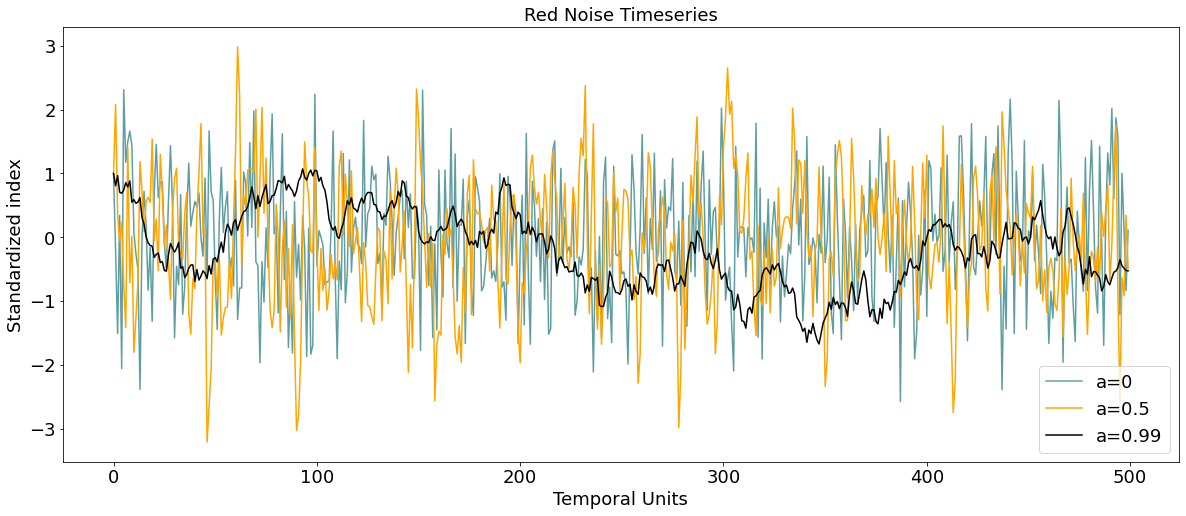

<Figure size 288x288 with 0 Axes>

In [8]:
def ar1_series(a,N):
    red_series = []
    red_series.append(1)
    for t in range(1,N,1):
        red_series.append(float(a*red_series[t-1] + np.sqrt(1-np.power(a,2))*stats.norm.rvs(size=1))) ##Barnes Ch. 2 Eq. 69
    return red_series

fs = 18
#colors = ['gray','cadetblue','orange','black']
colors = ['cadetblue','orange','black']
fig,ax = plt.subplots(1,1,figsize=(20,8))   
ax.set_title('Red Noise Timeseries', fontsize=fs)
ax.tick_params(labelsize=fs)
ax.set_xlabel('Temporal Units', fontsize=fs)
ax.set_ylabel('Standardized index', fontsize=fs)

## Generate 4 standardized red noise time series of length 500
length = 500 # length of red noise time series
tsnum  = 3   # how many red noise time series to generate
#ar1_list = [0,0.25,0.5,0.92]
ar1_list = [0,0.5,0.99]
RN_full = np.empty((tsnum,length)) # will contain all 4 red noise timeseries
f = plt.figure(figsize=(4,4))
for i in range(tsnum):
    red_noise_ts = ar1_series(ar1_list[i],length)
    RN_full[i,:] = red_noise_ts 
    ax.plot(RN_full[i,:],color=colors[i],label='a='+str(np.round(ar1_list[i],3)))
ax.legend(fontsize=fs)

for i in range(tsnum):
    print('mean:', RN_full[i,:].mean())
    print('std:', RN_full[i,:].std())
    print()

### Problem 1b

Text(0.5, 0, 'Standardized Index')

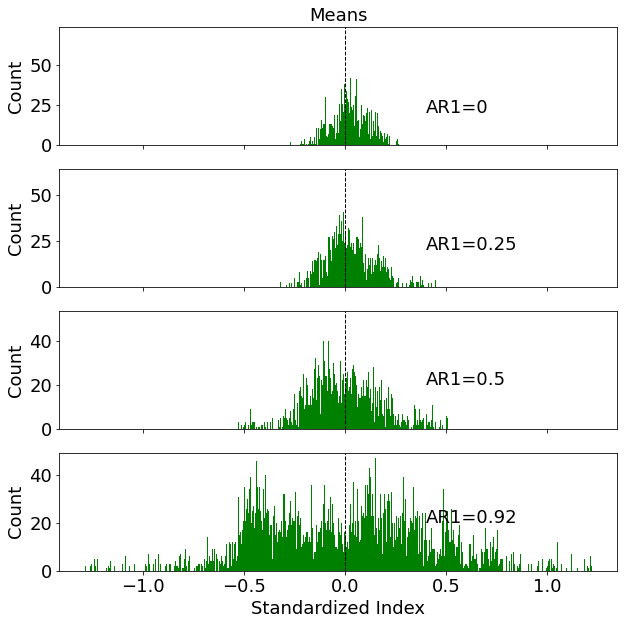

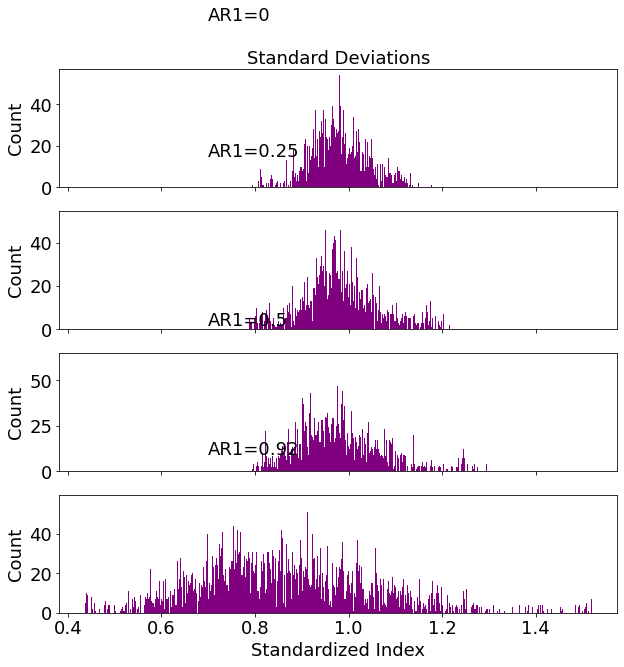

In [3]:


num_iterations = 10000 # Monte Carolo style 10000 times
MEANS_full = np.empty((tsnum,num_iterations)) # empty array to carray means
STD_full   = np.empty((tsnum,num_iterations)) # empty array to carry standard deviations


sample_length = 100 # length of drawn samples
for i in range(num_iterations):
    # generate a random starting index. Then create a list of the next 100 indices
    # the starting index must be low enough to have 100 successive indices
    start = np.random.randint(low=0,high=length-100,size=1) 
    indices = np.arange(start,start+sample_length) 
    for j in range(tsnum):
        sample = RN_full[j,indices] # get a sample of 100 values for each of the 4 red noise timeseries     
        MEANS_full[j,i] = sample.mean() # get the sample mean
        STD_full[j,i]   = sample.std()  # get the sample standard deviation

labels=['AR1=0','AR1=0.25','AR1=0.5','AR1=0.92']
fig,ax = plt.subplots(4,1,sharex=True,figsize=(10,10))
for i in range(tsnum):
    ax[i].hist(MEANS_full[i,:], 1000, facecolor='green')
    ax[i].set_ylabel('Count', fontsize=18)
    ax[i].text(0.4,20,labels[i], fontsize=18)
    ax[i].axvline(0,ls='--',lw=1,c='black')
    ax[i].tick_params(labelsize=18)
ax[0].set_title('Means', fontsize=18)
ax[-1].set_xlabel('Standardized Index', fontsize=18)
    
fig,ax = plt.subplots(4,1,sharex=True,figsize=(10,10))
for i in range(tsnum):
    ax[i].hist(STD_full[i,:], 1000, facecolor='purple')
    ax[i].set_ylabel('Count', fontsize=18)
    ax[i].text(0.7,80,labels[i], fontsize=18)
    ax[i].tick_params(labelsize=18)
ax[0].set_title('Standard Deviations', fontsize=18)
ax[-1].set_xlabel('Standardized Index', fontsize=18)


### Problem 1c

In [4]:
N = length
for alpha in ar1_list:
    print(alpha)
    Nstar = np.round((1-np.abs(alpha))/(1+np.abs(alpha))*N,0)
    print('#independent samples, N*: ',Nstar) ## Chapter 2 Barnes Eq. 88

0
#independent samples, N*:  5000.0
0.25
#independent samples, N*:  3000.0
0.5
#independent samples, N*:  1667.0
0.92
#independent samples, N*:  208.0


### Problem 3

In [3]:
# Read in data
directory = '/Users/daro8074/OneDrive - UCB-O365/CU_2022/ObjectiveDataAnalysis/mydata/'

QKE = pd.read_csv(directory+'QKE.csv')   # QKE
PBLH = pd.read_csv(directory+'PBLH.csv') # PBLH
times = pd.read_csv(directory+'times.csv')

QKE = np.array(QKE['0'])
PBLH = np.array(PBLH['0'])
times = np.array(times['0'][36:])

QKE = np.array(QKE)
PBLH = np.array(PBLH)
times = np.array(times)


print('finished...')

finished...


In [7]:
print('N:', len(times))


N: 253


## Problem 3a

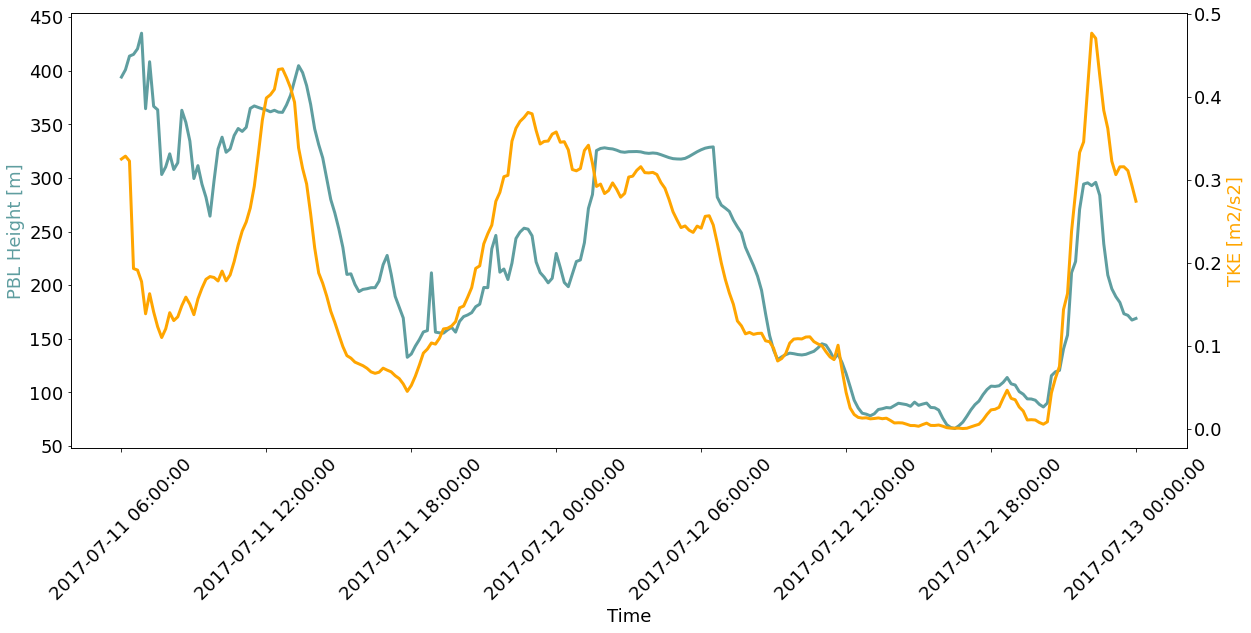

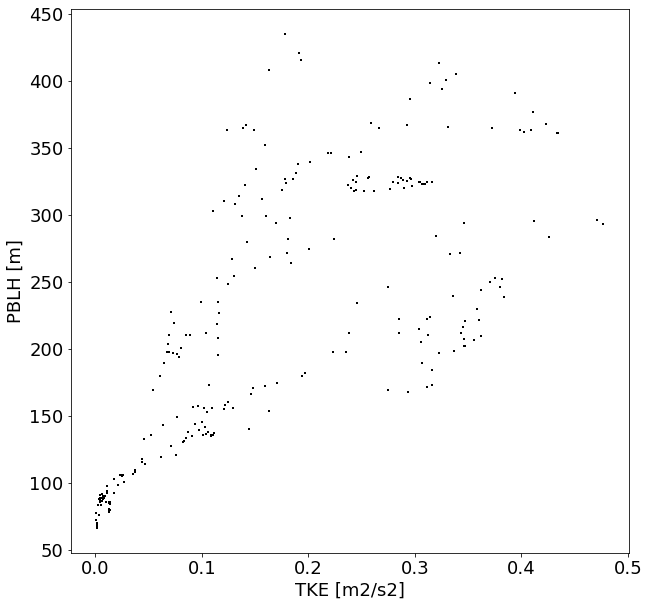

In [8]:
fs = 18
    
fig,ax = plt.subplots(1,1,figsize=(20,8))
ax2 = ax.twinx()
ax.plot(times,PBLH, c='cadetblue', lw=3, label='PBL Height')
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('PBL Height [m]', c='cadetblue', fontsize=fs)
plt.xticks(times[::36])
ax.set_xticklabels(times[::36],rotation=45)
ax.tick_params(labelsize=fs)

ax2.plot(times,QKE, c='orange', lw=3, label='TKE')
ax2.set_ylabel('TKE [m2/s2]', c='orange', fontsize=fs,)
ax2.tick_params(labelsize=fs)



## Plot a scatter plot
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(QKE, PBLH, c='black',s=6, marker='+')
ax.set_xlabel('TKE [m2/s2]', fontsize=fs)
ax.set_ylabel('PBLH [m]', fontsize=fs)
plt.tick_params(labelsize=fs)



## Problem 3b

standardized PBLH population mean  : 3.2297397080004555e-16
standardized PBLH population std: 0.7400136509824288 

standardized QKE population mean: 8.425407933914231e-17
standardized QKE population std: 0.9634635859544277 



Text(0.5, 1.0, 'Detrended Standardized TKE and PBLH')

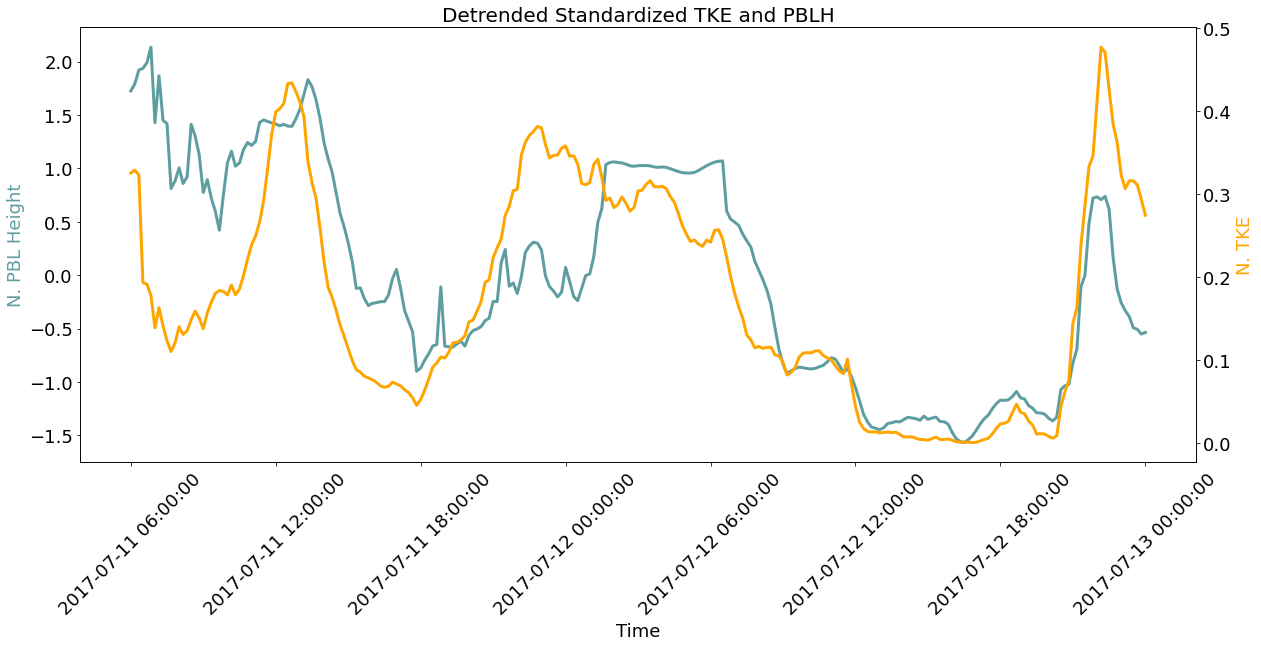

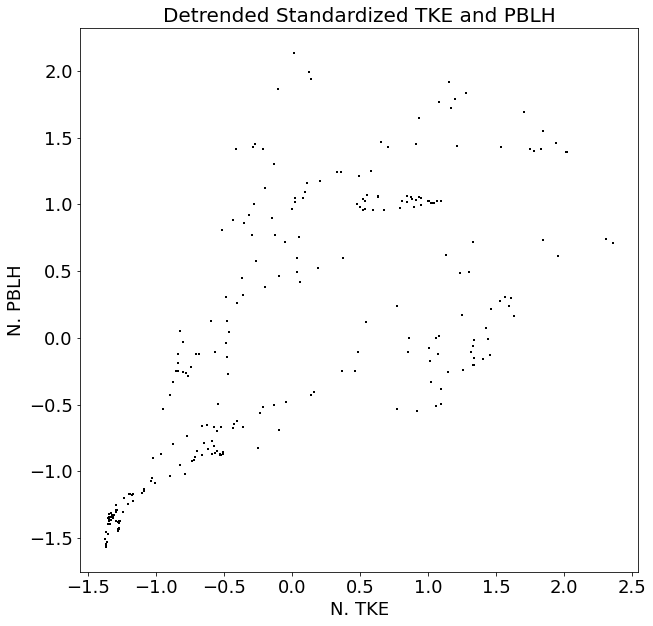

In [9]:
# Standardize the data
def standardize(DATA):
    '''
    Standardize data
    Barnes Eq. 71
    To be Guassian: mean=0 and std=1
    '''
    mean = np.mean(DATA)
    std = np.std(DATA)
    DATA_norm = (DATA-mean)/std
    return(DATA_norm)
QKE_s  = standardize(QKE)
PBLH_s = standardize(PBLH)

# detrend the data (_f for final)
PBLH_dt = signal.detrend(PBLH_s,type='linear')
QKE_dt = signal.detrend(QKE_s,type='linear')

print('standardized PBLH population mean  :', np.mean(PBLH_dt))
print('standardized PBLH population std:', np.std(PBLH_dt), '\n')
print('standardized QKE population mean:', np.mean(QKE_dt))
print('standardized QKE population std:', np.std(QKE_dt), '\n')


fs = 18
## Plot a timeseries
fig,ax = plt.subplots(1,1,figsize=(20,8))
ax2 = ax.twinx()
ax.plot(times,PBLH_s, c='cadetblue', lw=3, label='PBL Height')
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('N. PBL Height', c='cadetblue', fontsize=fs)
plt.xticks(times[::36])
ax.set_xticklabels(times[::36],rotation=45)
ax.tick_params(labelsize=fs)

ax2.plot(times,QKE, c='orange', lw=3, label='TKE')
ax2.set_ylabel('N. TKE', c='orange', fontsize=fs,)
ax2.tick_params(labelsize=fs)
plt.title('Detrended Standardized TKE and PBLH', fontsize=20)

## Plot a scatter plot
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(QKE_s, PBLH_s, c='black',s=6, marker='+')
ax.set_xlabel('N. TKE', fontsize=fs)
ax.set_ylabel('N. PBLH', fontsize=fs)
plt.tick_params(labelsize=fs)
plt.title('Detrended Standardized TKE and PBLH', fontsize=20)


## Unfortunately, the PBLH data is not perfectly Normal, but this is what we have

## Problem 3c - autocorrelation and N*

In [10]:
def autocorrelation(data,lag):
    N = len(data) # sample length
    mean = np.mean(data) # get the mean
    sigma = np.std(data) # get the standard deviation
    data1 = data-mean    # get the turbulent quantities
    t1_m = data1[0:-1*lag] # normal timeseries
    t2_m = data1[lag:]     # lagged timeseries
    # correlate with numpy
    AR1_np = np.correlate(t1_m,t2_m,mode='valid')/(N-lag)/(sigma**2) 
    # Barnes Chapter 2 Eq. 68 normalized by the variance (the dot product takes care of the sum in the equation)
    AR1 = np.dot(t1_m,t2_m)/(N-lag)/sigma**2 
    print('autocorrelation:', np.round(AR1_np[0],4))
    print('autocorrelation:', np.round(AR1,4))
    # calculate Nstar using 3 methods
    Nstar = np.round((1-AR1_np)/(1+AR1_np)*N) # method 1
    Nstar2 = np.round(-0.5*np.log(AR1)*N)     # method 2
    Te = -1*lag/np.log(AR1)
    Nstar3 = np.round(N*lag/(2*Te))           # method 3
    print('Nstar:', Nstar)
    print('Nstar:', Nstar2)
    print('Nstar:', Nstar3)
    print('\n')
    return(AR1_np,Nstar2)

AR1_PBLH_s,Nstar_PBLH = autocorrelation(PBLH_s,1)
AR1_QKE_s,Nstar_QKE = autocorrelation(QKE_s,1)




autocorrelation: 0.9856
autocorrelation: 0.9856
Nstar: [2.]
Nstar: 2.0
Nstar: 2.0


autocorrelation: 0.9892
autocorrelation: 0.9892
Nstar: [1.]
Nstar: 1.0
Nstar: 1.0




## Problem 3d

Effective sample sizes: 2.0 1.0
a1: 0.711109964045131
r: 89.95541045170907
Slope (regression coefficient):  0.711
Y-intercept:  4.368728429057577e-16
Correlation coefficient (r):  0.711
Percent variance explained (r square):  50.57 %



Text(0, 0.5, 'PBLH index detrended and std.')

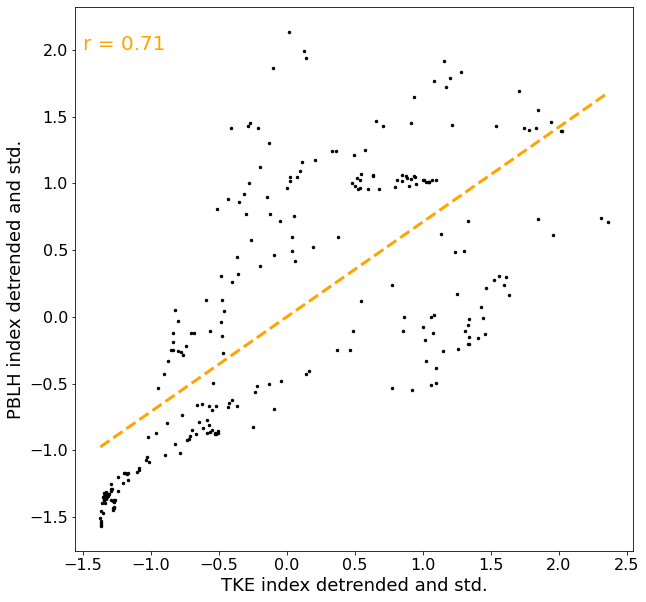

In [11]:
## Calculate the regression coefficient (a1)
Nx = Nstar_PBLH
Ny = Nstar_QKE
#----------------------------------
# Calculate the slope
print('Effective sample sizes:', Nx, Ny)
# get covariance
xy_cov = (1/(Nx-1))*np.sum((QKE_s-QKE_s.mean())*(PBLH_s-PBLH_s.mean()))
# get QKE_s variance
x_var = (1/(Nx-1))*np.sum((QKE_s-np.average(QKE_s))**2)
# get regression coefficient
a1 = xy_cov/x_var
print('a1:', a1)
#----------------------------------
## get correlation coefficient r 
r = (1/Nx)*np.sum((PBLH_s-PBLH_s.mean())*(QKE_s-QKE_s.mean()))/np.std(PBLH_s)/np.std(QKE_s)
print('r:', r)
## check that a1=r*(sy/sx) using Barnes Chp. 2 Eq. 38
# this works when using the full lengths because STD's are both 1 when it's normalized. 
# This was double checked using non-standardized values.  This unfortunately does not work when using N*
#print('a1 check:', r*(np.std(PBLH_s)/np.std(QKE_s))) 
#----------------------------------
# Check my math with python
slope,intercept,r_value,p_value,std_err = stats.linregress(QKE_s,PBLH_s)
print("Slope (regression coefficient): ",np.round(slope,3))
print("Y-intercept: ",intercept)
print("Correlation coefficient (r): ",np.round(r_value,3))
print("Percent variance explained (r square): ",np.round((r_value**2)*100,2), "%")
#----------------------------------

print()
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(QKE_s,PBLH_s,c='black',s=6)
plt.plot(np.linspace(np.min(QKE_s),np.max(QKE_s),len(QKE_s)),\
         np.linspace(np.min(QKE_s),np.max(QKE_s),len(QKE_s))*slope + intercept,color='orange',linewidth=3,ls='--');
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(-1.5,2,'r = '+str(np.round(r_value,2)),fontsize=20,c='orange')
plt.xlabel('TKE index detrended and std.',fontsize=18)
plt.ylabel('PBLH index detrended and std.',fontsize=18)


In [14]:
# Assess the statistical significance 
# Using Fisher-Z, we assume there is a correlation

## Calculate the Fisher-Z Transformation mean, Barnes Ch. 2 Eq. 52
Z = (1/2)*np.log((1+r_value)/(1-r_value)) 

# We cannot use the degrees of freedom from the effective sample size of 1, so the full dataset is used
df = len(QKE_s)-3 # Calculate the degrees of freedom

# Calculate the Fisher-Z Transformation standard deviation Barnes Ch. 2 Equation 5
sigma_Z = 1/np.sqrt(df)

## Calculate the critical t-score. We will use a two sided test with alpha/2
tcrit = stats.t.ppf(0.975,df)
print('tcritical:', tcrit) # should be 1.96 since we have >100 data points
## Calculate the confidence intervals on the mean (mu_Z)
Zmin = Z-tcrit*sigma_Z ## Barnes Ch. 2 Equation 54
Zmax = Z+tcrit*sigma_Z ## Barnes Ch. 2 Equation 54
print('Zmin',Zmin)
print('Zmax',Zmax)

## Convert to give a confidence interval on the correlation using Barnes Ch. 2 Eq. 55
rho_min = np.tanh(Zmin)
rho_max = np.tanh(Zmax)
print('Rhomin (minimum 95% confidence interval for r_value):',round(rho_min,2))
print('Rhomax (maximum 95% confidence interval for r_value):',round(rho_max,2))
print()
print()


tcritical: 1.9694983934204002
Zmin 0.7648636962867645
Zmax 1.0139877271367983
Rhomin (minimum 95% confidence interval for r_value): 0.64
Rhomax (maximum 95% confidence interval for r_value): 0.77




In [15]:
## Calculate the statistical significance
tcrit = stats.t.ppf(0.975,df)

# Using the t-statistic, we assume there is no correlation, or that rho=0

# As before, we cannot use a negative degrees of freedom since the effective sample size is 1
N = len(QKE_s)
t = r_value*np.sqrt(N-2)/np.sqrt(1-r_value**2)
print('t:', t)
print('tcrit:', tcrit)



t: 16.023905797757934
tcrit: 1.9694983934204002


### Apply Granger causality 

In [16]:
# Determine if PBL height can be used to predict itself using only lagged values of itself
# We can do this through creating an array of r values through multi-linear regression (Barnes Ch. 2, eq'n 118)

mean = np.mean(PBLH_s)
sigma = np.std(PBLH_s)
N = len(PBLH_s)

# Lagged correlations
# Boundary layer turbulence typically has a maximum timescale of an hour.  
# Since this data is at a 10-min output frequency, we choose lags from 1-6
lagged_correlations = np.zeros(6)

for i in range(6):
    lag = i + 1
    t1_m=PBLH_s[0:-1*lag]-mean # get turbulent quantities
    t2_m=PBLH_s[lag:]-mean     # get turbulent quantities
    
    # Calculate the autocorrelation using numpy correlate lagN
    AR1_np=np.correlate(t1_m,t2_m,mode='valid')/(N-lag)/(sigma**2)
    lagged_correlations[i] = AR1_np # append to array
    
#print("Lagged correlations: ",lagged_correlations)

# What is the variance explained using only lagged values of ASL central pressure? 
# Maximum correlation
print("Maximum Correlation (r): ",np.round(np.max(lagged_correlations),4))
# Maximum variance explained
print("Maximum Variance Explained (r squared): ",np.round(np.max(lagged_correlations**2),6)*100,"%")


Maximum Correlation (r):  0.9856
Maximum Variance Explained (r squared):  97.13929999999999 %


In [17]:
# Cool, so can we get more information by adding in TKE? 
# If the maximum variance explained here is larger, we get more information.  If
# it's not larger, then we don't

# Perform the multi-linear regression again, this time adding lagged values of SAM index
# Using sklearn LinearRegression function (Jen's method)
R2_lagged_PBLH_and_QKE = np.empty(6)
for i in range(6):
    lag = i+1
    X = np.swapaxes([PBLH_s[lag:],QKE_s[lag:]],1,0)
    Y = np.swapaxes([PBLH_s[0:-1*lag]],1,0)
    reg = linear_model.LinearRegression().fit(X, Y)
    R2 = reg.score(X, Y)
    R2_lagged_PBLH_and_QKE[i] = R2

print("Highest variance explained: ",np.max(R2_lagged_PBLH_and_QKE)*100,'%')

print('Since the variance explained, r2, is larger, adding in TKE can help explain PBL height')

Highest variance explained:  97.65931985187588 %
Since the variance explained, r2, is larger, adding in TKE can help explain PBL height


In [18]:
# F-test: comparison of variance (here variance explained)

var_lagged_PBLH = np.max(lagged_correlations**2) # max variance explained by lagged PBLH only
var_lagged_PBLH_and_QKE = np.max(R2_lagged_PBLH_and_QKE) # max variance explained by adding in TKE
# f=(s1**2) / (s2**2) 
# the larger variance must be in the numerator
if var_lagged_PBLH_and_QKE > var_lagged_PBLH:
    f = var_lagged_PBLH_and_QKE/var_lagged_PBLH
else:
    f = var_lagged_PBLH/var_lagged_PBLH_and_QKE

# Critial value of F
deg_of_freedom_num = N-1 # use effective sample size where possible here
deg_of_freedom_den = N-1 # use effective sample size where possible here
f_crit = scipy.stats.f.ppf(q=1-0.05, dfn=deg_of_freedom_num, dfd=deg_of_freedom_den)


print('f:', f)
print('f_crit:', f_crit)



f: 1.005353388602055
f_crit: 1.2307498191056336
